In [220]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from math import *
from scipy.stats import expon, norm, weibull_min, lognorm, probplot
from sklearn.linear_model import LinearRegression

data = pd.read_csv('Dados-medicos.csv', delim_whitespace=True)
data.columns= ['Idade', 'Peso', 'Carga Final', 'VO2']
color = ['blue','green', 'red', 'purple']
 
data.describe()



,Idade,Peso,Carga Final,VO2
count,1172.000000,1172.000000,1172.000000,1172.000000
mean,53.290956,85.925776,172.271502,29.394728
std,14.746297,14.799113,70.093124,10.497250
min,18.000000,45.300000,30.000000,5.846847
25%,42.000000,76.100000,120.000000,21.797423
50%,54.000000,83.700000,170.000000,28.326660
75%,64.000000,94.450000,220.000000,35.853793
max,91.000000,178.900000,432.000000,73.333333


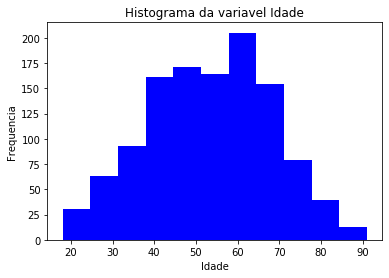

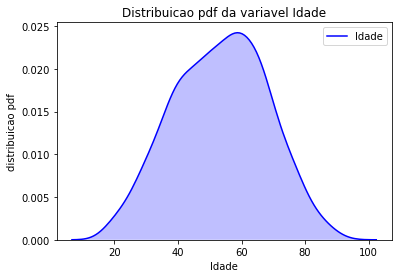

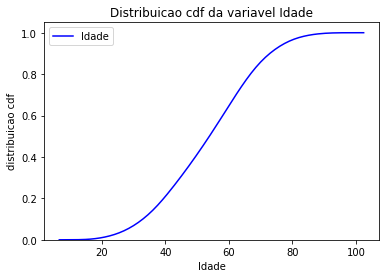

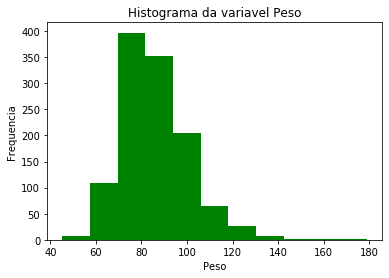

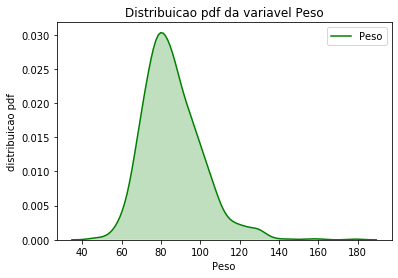

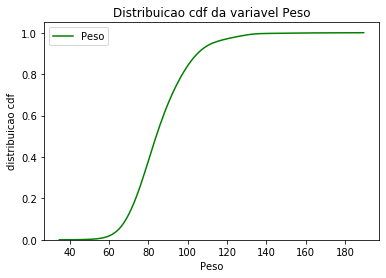

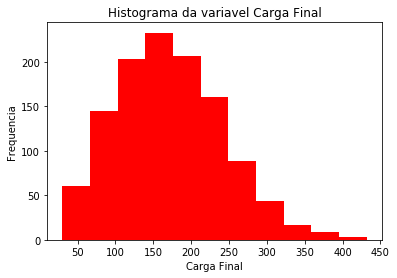

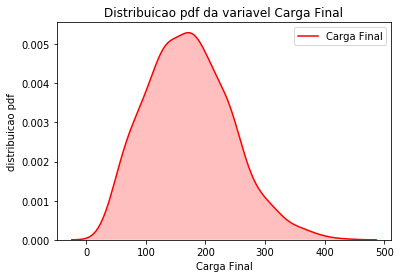

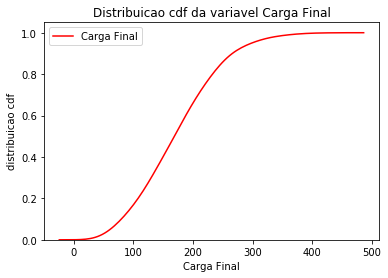

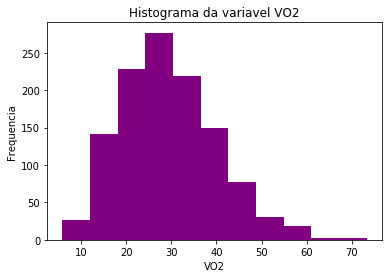

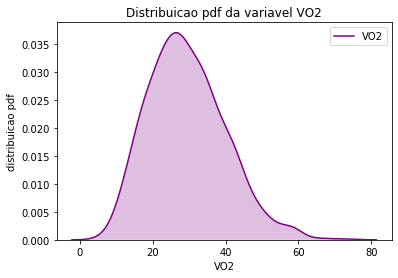

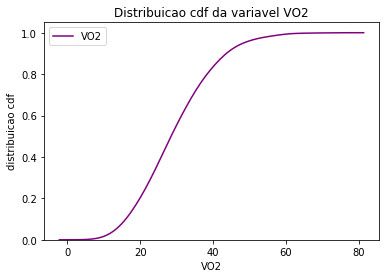

In [315]:
for i in range(0,4):
    
    j = data.columns[i]
    bin = 1+ 3.3* log10(1172)
    m = int(bin)
    
    #Histograma
    plt.hist(data[data.columns[i]], color=color[i], bins = m)
    plt.title('Histograma da variavel '+ j)
    plt.xlabel(j)
    plt.ylabel('Frequencia')
    plt.savefig('Histograma da variavel '+ j)
    plt.show()
    
    #Distribuicao pdf
    sns.kdeplot(data[data.columns[i]],color=color[i], shade=True)
    plt.title('Distribuicao pdf da variavel ' + j)
    plt.xlabel(j)
    plt.ylabel('distribuicao pdf')
    plt.savefig('Distribuicao pdf da variavel ' + j)
    plt.show()
    
    #DIstribuicao cdf
    sns.kdeplot(data[data.columns[i]],color=color[i], cumulative=True)
    plt.title('Distribuicao cdf da variavel ' + j)
    plt.xlabel(j)
    plt.ylabel('distribuicao cdf')
    plt.savefig('Distribuicao cdf da variavel ' + j)
    plt.show()

Lambda da exponecial: 0.018764910258257682
Stardand Deviation da Gaussiana: 14.746296966880655
Constante da Weibull:  4.089481828645864
loc da Weibull:  0
Scale da Weibull:  58.78289005707875
Parametros da LogNormal
Sigma:  0.30599541757899545 
Mean:  3.932509819486875
Scale:  51.03490546445673


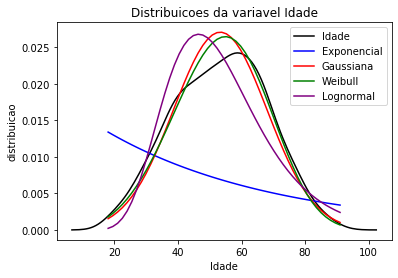

Lambda da exponecial: 0.01163795127968308
Stardand Deviation da Gaussiana: 14.799113384059632
Constante da Weibull:  5.408013188534343
loc da Weibull:  0
Scale da Weibull:  92.24080850317551
Parametros da LogNormal
Sigma:  0.16609333853515282 
Mean:  4.439451920143028
Scale:  84.72849096643188


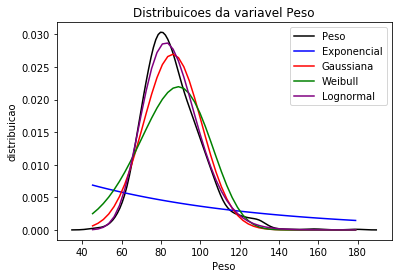

In [ ]:
for i in range(0,4):
    
    j = data.columns[i]
    media = data[j].mean()
    dom = np.linspace(data[j].min(), data[j].max())
    gauss_std = data[j].std()
    
    #Distribuicao empírica
    sns.kdeplot(data[data.columns[i]],color='black', shade=False, label = j)
    plt.title('Distribuicao pdf da variavel ' + j)
    plt.xlabel(j)
    plt.ylabel('distribuicao pdf')
    plt.savefig('Distribuicao pdf da variavel ' + j)
    
    
    #Distribuicao exponencial
    exp_lamb = 1/media 
    exponencial = expon.pdf(dom,scale= 1/exp_lamb)
    print('Lambda da exponecial: ' + str(exp_lamb))
    plt.plot(dom, exponencial, label ="Exponencial", color='blue')
    
    
    #Distribuicao gaussiana
    plt.plot(dom, norm.pdf(dom, media, gauss_std), label='Gaussiana', color = 'red')
    print('Stardand Deviation da Gaussiana: ' + str(gauss_std))
    
    #Distribuicao Weilbull
    
    w_params = weibull_min.fit(data[j],floc=0)
    weibull = stats.weibull_min.pdf(dom, w_params[0],loc=w_params[1], scale=w_params[2])
    plt.plot(dom, weibull, label = "Weibull", color='green')
    print("Constante da Weibull: ",w_params[0])
    print("loc da Weibull: ", w_params[1])
    print("Scale da Weibull: ",w_params[2])
    
    #Distribuicao Lognormal
    
    ln_params = lognorm.fit(data[j], floc=0)
    lognormal = lognorm.pdf(dom, ln_params[0], ln_params[1], ln_params[2])
    plt.plot(dom, lognormal, label= 'Lognormal', color = 'purple')
    print('Parametros da LogNormal') 
    print('Sigma: ',ln_params[0], '\nMean: ',log(ln_params[2]))
    print("Scale: ",ln_params[2]) 
    
    #Grafico
    plt.title('Distribuicoes da variavel ' + j)
    plt.legend()
    plt.xlabel(j)
    plt.ylabel('distribuicao')
    plt.savefig('distribuicoes da variavel ' + j)
    plt.show()
    

Variavel:  Idade
Media:  53.29095563139932
Desvio Padrao:  14.746296966880655
Variancia:  217.45327423543358


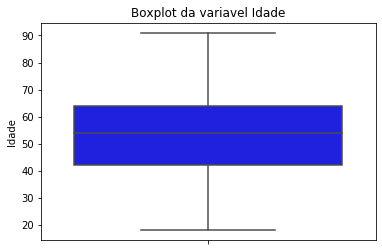

Variavel:  Peso
Media:  85.92577645051215
Desvio Padrao:  14.799113384059632
Variancia:  219.01375695425293


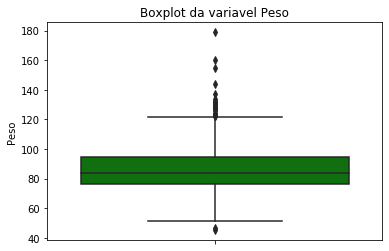

Variavel:  Carga Final
Media:  172.27150170648466
Desvio Padrao:  70.09312366247202
Variancia:  4913.045984762596


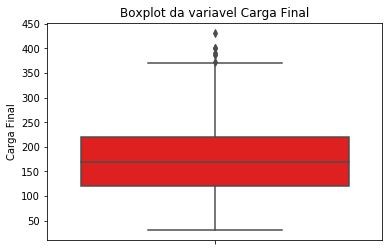

Variavel:  VO2
Media:  29.394727923153184
Desvio Padrao:  10.497249893426014
Variancia:  110.19225532503248


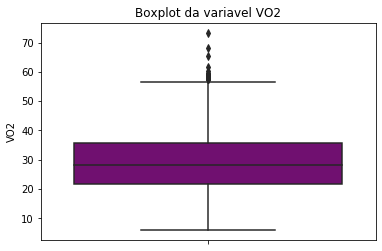

In [177]:
for i in range (0,4):
    
    j= data.columns[i]
    
    print ('Variavel: ', j)
    print ('Media: ', data[j].mean())
    print ('Desvio Padrao: ', data[j].std())
    print ('Variancia: ', data[j].var())
    sns.boxplot(y = j, data = data, color = color[i])
    plt.title('Boxplot da variavel '+ j)
    plt.savefig('Boxplot da variavel '+ j)
    plt.show()

QQPlot para Idade


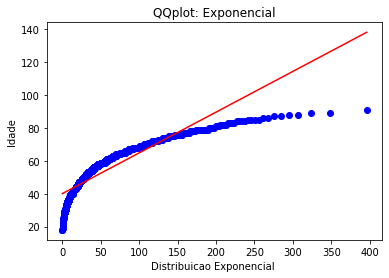

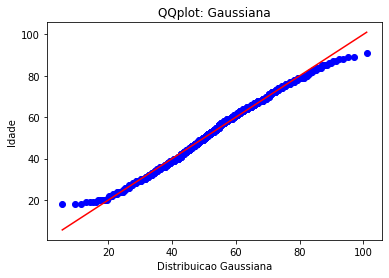

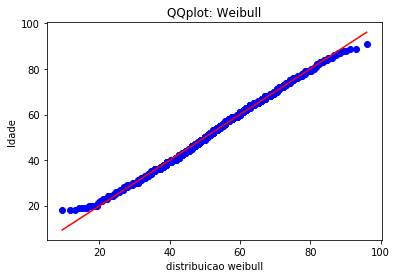

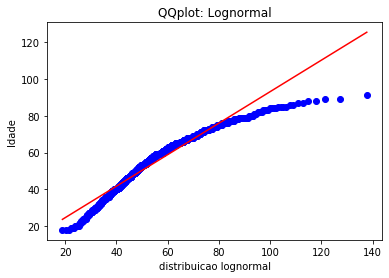

QQPlot para Peso


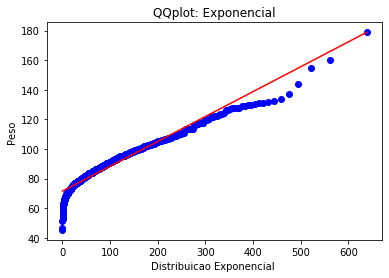

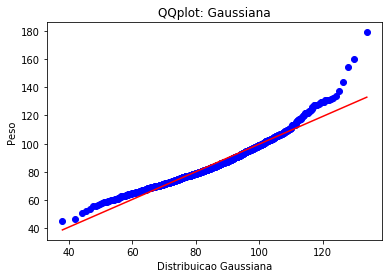

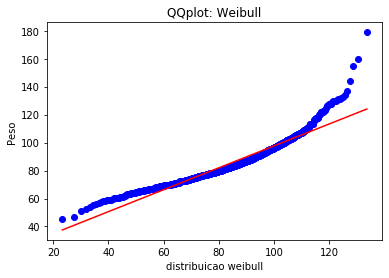

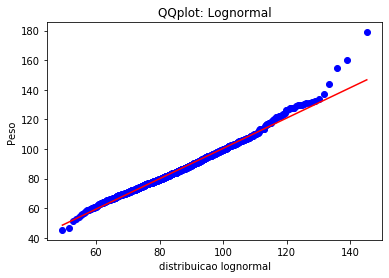

QQPlot para Carga Final


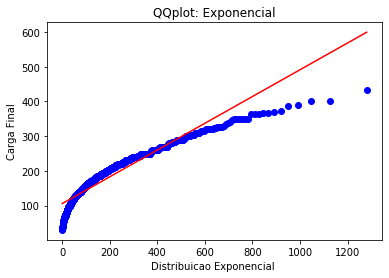

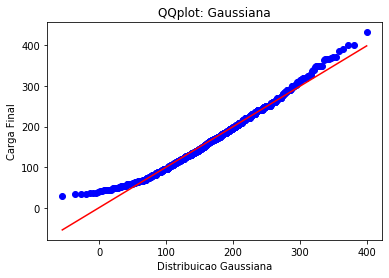

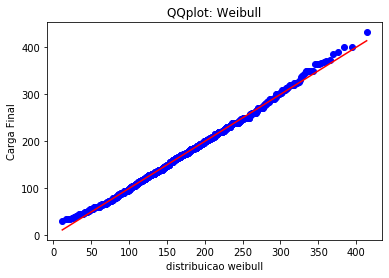

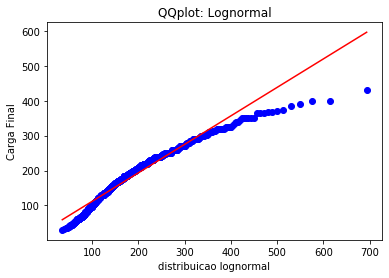

QQPlot para VO2


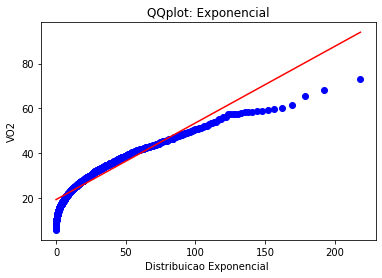

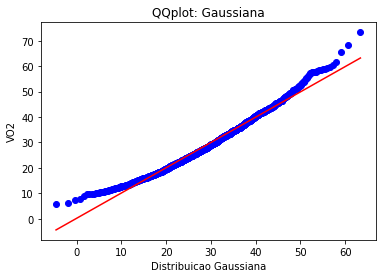

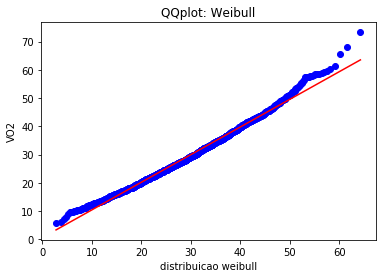

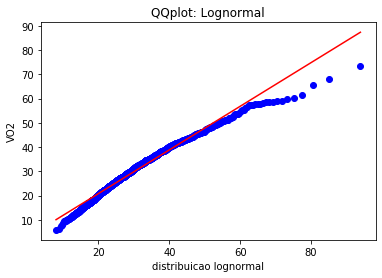

In [313]:
for i in range(0,4):
    j = data.columns[i]
    
    print('QQPlot para '+ j)
    
    #Exponencial
    ex_params = stats.expon.fit(data[j], floc=0)
    stats.probplot(data[j], dist ='expon', sparams=ex_params, plot = plt)
    plt.title('QQplot: Exponencial')
    plt.ylabel(j)
    plt.xlabel('Distribuicao Exponencial ')
    plt.savefig('QQplot_exponencial_e_'+ j +'.png')
    plt.show()
    
    #Gaussiana
    n_params = stats.norm.fit(data[j])
    stats.probplot(data[j], dist = 'norm', sparams = n_params, plot = plt)
    plt.title('QQplot: Gaussiana')
    plt.ylabel(j)
    plt.xlabel('Distribuicao Gaussiana')
    plt.savefig('QQplot_gaussiana_e_'+ j +'.png')
    plt.show()
    
    #Weibull
    w_params = stats.weibull_min.fit(data[j], floc=0)
    stats.probplot(data[j], dist = 'weibull_min', sparams = w_params, plot = plt)
    plt.title('QQplot: Weibull')
    plt.ylabel(j)
    plt.xlabel('distribuicao weibull')
    plt.savefig('QQplot_weibull_e_'+ j + '.png')
    plt.show()
    
     #Lognormal
    ln_params = stats.lognorm.fit(data[j], floc=0)
    stats.probplot(data[j], dist = 'lognorm', sparams = ln_params,plot=plt)
    plt.title('QQplot: Lognormal')
    plt.ylabel(j)
    plt.xlabel('distribuicao lognormal')
    plt.savefig('QQplot_lognormal_e_'+ j + '.png')
    plt.show()

In [317]:
#Teste de hipotese KS (Kolmogorov-Smirnov)

for i in range(0,4):
    
    j = data.columns[i]
    
    print('Teste de hipótese KS para ' + j + '\n')
    
    #Exponencial
    ex_params = stats.expon.fit(data[j], floc=0)
    print('KS-statistic D = %f pvalue = %f'% stats.kstest(data[j], 'expon', ex_params))
    
    #Gaussiana
    n_params = stats.norm.fit(data[j])
    print('KS-statistic D = %f pvalue = %f'% stats.kstest(data[j], 'norm', n_params))
    
    #Weilbull
    w_params = stats.weibull_min.fit(data[j], floc=0)
    print('KS-statistic D = %f pvalue = %f'% stats.kstest(data[j], 'weibull_min', w_params))
    
    #Lognormal
    ln_params = stats.lognorm.fit(data[j], floc=0)
    print('KS-statistic D = %f pvalue = %f \n'% stats.kstest(data[j], 'lognorm', ln_params))

Teste de hipótese KS para Idade

KS-statistic D = 0.372756 pvalue = 0.000000
KS-statistic D = 0.044084 pvalue = 0.020392
KS-statistic D = 0.033038 pvalue = 0.151452
KS-statistic D = 0.084730 pvalue = 0.000000 

Teste de hipótese KS para Peso

KS-statistic D = 0.495441 pvalue = 0.000000
KS-statistic D = 0.066618 pvalue = 0.000058
KS-statistic D = 0.103217 pvalue = 0.000000
KS-statistic D = 0.032285 pvalue = 0.170040 

Teste de hipótese KS para Carga Final

KS-statistic D = 0.286516 pvalue = 0.000000
KS-statistic D = 0.039234 pvalue = 0.052777
KS-statistic D = 0.024570 pvalue = 0.478863
KS-statistic D = 0.080360 pvalue = 0.000000 

Teste de hipótese KS para VO2

KS-statistic D = 0.334890 pvalue = 0.000000
KS-statistic D = 0.044532 pvalue = 0.018572
KS-statistic D = 0.036747 pvalue = 0.082345
KS-statistic D = 0.040561 pvalue = 0.041131 



In [218]:
data.corr()

,Idade,Peso,Carga Final,VO2
Idade,1.000000,-0.146315,-0.692058,-0.630072
Peso,-0.146315,1.000000,0.186422,-0.174401
Carga Final,-0.692058,0.186422,1.000000,0.878326
VO2,-0.630072,-0.174401,0.878326,1.000000


Para a variavel Idade

Regressao linear: a = -0.448521 ; b = 53.296839
Coeficiente de correlacao: -0.630072


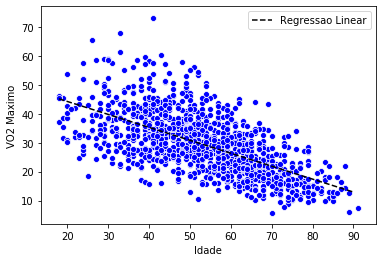

Para a variavel Peso

Regressao linear: a = -0.123705 ; b = 40.024191
Coeficiente de correlacao: -0.174401


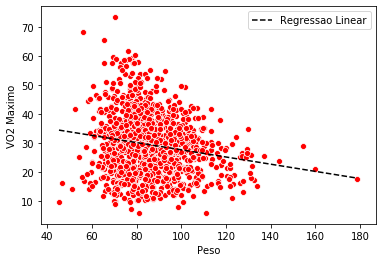

Para a variavel Carga Final

Regressao linear: a = 0.131539 ; b = 6.734248
Coeficiente de correlacao: 0.878326


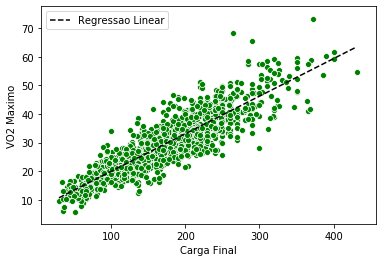

In [310]:
mean_vo2 = np.mean(data['VO2'])

for i in range(0,3):
    j = data.columns[i]
    mean_x = np.mean(data[j])
    dom = np.arange(data[j].min(), data[j].max())
    colors = ['blue', 'red', 'green']
    

    linear_regress = np.polyfit(data[j], data['VO2'], 1)
    y = linear_regress[1] + linear_regress[0] * dom
    
    print('Para a variavel '+ j +'\n')
    print('Regressao linear: a = %f ; b = %f' % (linear_regress[0], linear_regress[1]))
    print('Coeficiente de correlacao: %f' % np.corrcoef(data[j],data['VO2'])[0][1])
    
    plt.plot(dom, y, '--', label = 'Regressao Linear', color='black')

    
    sns.scatterplot(data[j], data['VO2'], color = colors[i])
    plt.xlabel(j)
    plt.ylabel('VO2 Maximo')
    plt.legend()
    plt.show()
    

In [316]:
#Inferencia Bayesiana

#Como o coeficiente de correlacao entre Carga Final e VO2maximo foi o maior, usaremos Carga Final

#Vamos dividi-la em 10 partes 

x = 'Carga Final'
y = 'VO2'

cf = [i for i in data[x]]
cf.sort()
#print(cf[0], cf[-1]) # 30.0 432.0
intervalo = (cf[-1] - cf[0])/10 # intervalo = 40.2

inf = 30.0
sup = 70.2
hipotese = []
prior = []

like_menor35 = []
like_maior35 = []

bayes_menor35=[]
bayes_maior35=[]

posterior_menor35=[]
posterior_maior35 =[]

previsao = []


for i in range(0, 10):
    hipotese += [(round(inf, 1), round(sup, 1))]
    count_prior = data[(data[x]>=inf) & (data[x]<sup)]
    prior.append(count_prior[x].count()/data[x].count())
    
    count_like_menor35 = data[(data[x]>=inf) & (data[x]<sup) & (data[y]<35.0)]
    like_menor35.append(count_like_menor35[y].count()/count_prior[x].count())
    
    count_like_maior35 = data[(data[x]>=inf) & (data[x]<sup) & (data[y]>=35.0)]
    like_maior35.append(count_like_maior35[y].count()/count_prior[x].count())
    
    inf += 40.2
    sup += 40.2


for i in range(0,10):
    bayes_menor35.append(prior[i]*like_menor35[i])
    bayes_maior35.append(prior[i]*like_maior35[i])
    
total_menor35=np.sum(bayes_menor35)
total_maior35=np.sum(bayes_maior35)


for i in range(0,10):
    posterior_menor35.append(bayes_menor35[i]/total_menor35)
    posterior_maior35.append(bayes_maior35[i]/total_maior35)



for i in range(0,10):
    previsao.append(posterior_menor35[i]*like_maior35[i])

probabilidade = np.sum(previsao)
    
# Montando as tabelas
table_menor35 = pd.DataFrame({'Hypothesis':hipotese,
                              'Prior':prior,
                              'Likelihood' : like_menor35,
                              'Bayes Num':bayes_menor35,
                              'Posterior':posterior_menor35})

table_maior35 = pd.DataFrame({'Hypothesis':hipotese,
                              'Prior':prior,
                              'Likelihood' :like_maior35,
                              'Bayes Num':bayes_maior35,
                              'Posterior':posterior_maior35})

table_cond = pd.DataFrame({'Hypothesis':hipotese,
                              'Prior':prior,
                              'Likelihood(<35)' :like_menor35,
                              'Bayes Num1':bayes_maior35,
                              'Posterior 1': posterior_menor35,
                              'Likelihood(>=35)' : like_maior35,
                             'prediction': previsao})


print('Hipótese: VO2 máximo abaixo da média 35 \n\n', table_menor35 ,'\n')
print(total_menor35,'\n\n\n')
print('Hipótese: VO2 máximo acima da média 35 \n\n', table_maior35,'\n')
print(total_maior35,'\n\n\n')
print('Hipótese: VO2 máximo acima da média 35, dado que antes estava abaixo da média \n\n', table_cond,'\n')
print(total_menor35, '\n')
print('probabilidade: ', probabilidade,'\n\n\n\n')
              
              

Hipótese: VO2 máximo abaixo da média 35 

        Hypothesis     Prior  Likelihood  Bayes Num  Posterior
0    (30.0, 70.2)  0.071672    1.000000   0.071672   0.099291
1   (70.2, 110.4)  0.132253    1.000000   0.132253   0.183215
2  (110.4, 150.6)  0.208191    0.987705   0.205631   0.284870
3  (150.6, 190.8)  0.209044    0.848980   0.177474   0.245863
4  (190.8, 231.0)  0.182594    0.588785   0.107509   0.148936
5  (231.0, 271.2)  0.119454    0.200000   0.023891   0.033097
6  (271.2, 311.4)  0.041809    0.061224   0.002560   0.003546
7  (311.4, 351.6)  0.024744    0.034483   0.000853   0.001182
8  (351.6, 391.8)  0.007679    0.000000   0.000000   0.000000
9  (391.8, 432.0)  0.001706    0.000000   0.000000   0.000000 

0.7218430034129693 



Hipótese: VO2 máximo acima da média 35 

        Hypothesis     Prior  Likelihood  Bayes Num  Posterior
0    (30.0, 70.2)  0.071672    0.000000   0.000000   0.000000
1   (70.2, 110.4)  0.132253    0.000000   0.000000   0.000000
2  (110.4, 150.6)  0.2

In [307]:
table_menor35

,Hypothesis,Prior,Likelihood,Bayes Num,Posterior
0,"(30.0, 70.2)",0.071672,1.000000,0.071672,0.099291
1,"(70.2, 110.4)",0.132253,1.000000,0.132253,0.183215
2,"(110.4, 150.6)",0.208191,0.987705,0.205631,0.284870
3,"(150.6, 190.8)",0.209044,0.848980,0.177474,0.245863
4,"(190.8, 231.0)",0.182594,0.588785,0.107509,0.148936
5,"(231.0, 271.2)",0.119454,0.200000,0.023891,0.033097
6,"(271.2, 311.4)",0.041809,0.061224,0.002560,0.003546
7,"(311.4, 351.6)",0.024744,0.034483,0.000853,0.001182
8,"(351.6, 391.8)",0.007679,0.000000,0.000000,0.000000
9,"(391.8, 432.0)",0.001706,0.000000,0.000000,0.000000


In [308]:
table_maior35

,Hypothesis,Prior,Likelihood,Bayes Num,Posterior
0,"(30.0, 70.2)",0.071672,0.000000,0.000000,0.000000
1,"(70.2, 110.4)",0.132253,0.000000,0.000000,0.000000
2,"(110.4, 150.6)",0.208191,0.012295,0.002560,0.009231
3,"(150.6, 190.8)",0.209044,0.151020,0.031570,0.113846
4,"(190.8, 231.0)",0.182594,0.411215,0.075085,0.270769
5,"(231.0, 271.2)",0.119454,0.800000,0.095563,0.344615
6,"(271.2, 311.4)",0.041809,0.938776,0.039249,0.141538
7,"(311.4, 351.6)",0.024744,0.965517,0.023891,0.086154
8,"(351.6, 391.8)",0.007679,1.000000,0.007679,0.027692
9,"(391.8, 432.0)",0.001706,1.000000,0.001706,0.006154


In [309]:
table_cond

,Hypothesis,Prior,Likelihood(<35),Bayes Num1,Posterior 1,Likelihood(>=35),prediction
0,"(30.0, 70.2)",0.071672,1.000000,0.000000,0.099291,0.000000,0.000000
1,"(70.2, 110.4)",0.132253,1.000000,0.000000,0.183215,0.000000,0.000000
2,"(110.4, 150.6)",0.208191,0.987705,0.002560,0.284870,0.012295,0.003502
3,"(150.6, 190.8)",0.209044,0.848980,0.031570,0.245863,0.151020,0.037130
4,"(190.8, 231.0)",0.182594,0.588785,0.075085,0.148936,0.411215,0.061245
5,"(231.0, 271.2)",0.119454,0.200000,0.095563,0.033097,0.800000,0.026478
6,"(271.2, 311.4)",0.041809,0.061224,0.039249,0.003546,0.938776,0.003329
7,"(311.4, 351.6)",0.024744,0.034483,0.023891,0.001182,0.965517,0.001141
8,"(351.6, 391.8)",0.007679,0.000000,0.007679,0.000000,1.000000,0.000000
9,"(391.8, 432.0)",0.001706,0.000000,0.001706,0.000000,1.000000,0.000000
